In [6]:
%matplotlib inline

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas
import brian2
import surfdist
from surfdist import utils, load
import nibabel as nib

In [ ]:
R = np.load('/Users/dmargulies/Downloads/R.npy')

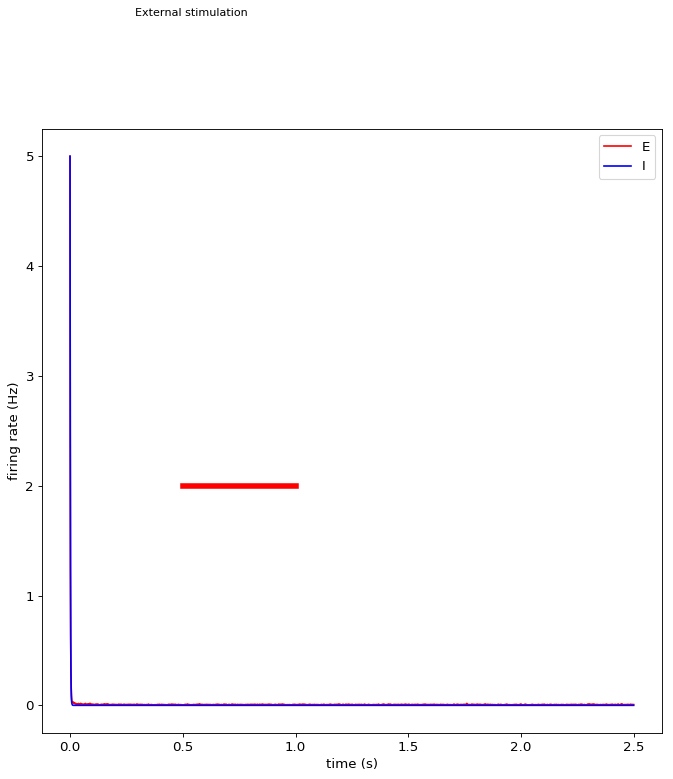

In [42]:
# To check response to stimulus

fig = plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 12})
start_time = 0.5 #seconds
end_time = 3.5 #seconds

cortex = np.sort(nib.freesurfer.read_label('fsaverage4/lh.cortex.label'))
V1 = surfdist.load.load_freesurfer_label('fsaverage4/lh.aparc.a2009s.annot', 'S_calcarine')
V1_index = surfdist.utils.translate_src(V1, cortex)

i = V1_index[1]
#ax = plt.subplot(10, 10, i)    

start_time = 0.
end_time   = 2.5
dt         = 1 * brian2.ms 
stim_on    = 0.5 
stim_off   = 1.0 

# Plot E population rates
plt.plot(np.arange((start_time)*brian2.second,(end_time)*brian2.second,dt),R[np.arange(int(start_time/dt),int(end_time/dt),1),i-1,0],color='r')
# Plot I population rates
plt.plot(np.arange((start_time)*brian2.second,(end_time)*brian2.second,dt),R[np.arange(int(start_time/dt),int(end_time/dt),1),i-1,1],color='b')

# Plot the stimulation time
plt.plot([stim_on*brian2.second,stim_off*brian2.second],[np.max(R)*0.4,np.max(R)*0.4],color='r',linewidth=5.0)

# place text above the stimulation line
axes = plt.gca()
axes.text(0.15, 1.2,'External stimulation', transform=axes.transAxes, fontsize=10, verticalalignment='top')

plt.legend(['E','I'])
plt.xlabel('time (s)')
plt.ylabel('firing rate (Hz)')
# plt.ylim(0, 80) 

plt.show()